# Visualizacion

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Leyenda" data-toc-modified-id="Leyenda-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Leyenda</a></span></li><li><span><a href="#Anotaciones" data-toc-modified-id="Anotaciones-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Anotaciones</a></span></li><li><span><a href="#Styles" data-toc-modified-id="Styles-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Styles</a></span></li><li><span><a href="#Referencias" data-toc-modified-id="Referencias-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Referencias</a></span></li></ul></div>

---
# Matplotlib - Elementos y Funcionalidades

Importamos y preparamos el conjunto de datos `dow_jones_index.data`

In [15]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [16]:
path = "/home/bigdatafutura/Sesion 03/files/dow_jones_index.data"

In [17]:
data = pd.read_csv(path)
data.head(3)

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.42849,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.47066,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.63831,12,0.189994


In [18]:
columns = ["stock", "date", "high", "low"]
data = data[columns]

In [19]:
data.head(3)

,stock,date,high,low
0,AA,1/7/2011,$16.72,$15.78
1,AA,1/14/2011,$16.71,$15.64
2,AA,1/21/2011,$16.38,$15.60


In [20]:
data[["high", "low"]] = data[["high", "low"]].applymap(lambda x: x.replace("$", "")).astype("float")

In [21]:
data["date"] = pd.to_datetime(data["date"], format="%m/%d/%Y")

In [22]:
data.head()

,stock,date,high,low
0,AA,2011-01-07,16.72,15.78
1,AA,2011-01-14,16.71,15.64
2,AA,2011-01-21,16.38,15.60
3,AA,2011-01-28,16.63,15.82
4,AA,2011-02-04,17.39,16.18


In [23]:
data["stock"].nunique()

30

In [24]:
data = data[data["stock"]=="AA"]

## Leyenda

Para incrustar una leyenda en un gráfico hay que incluir la linea `plt.legend`

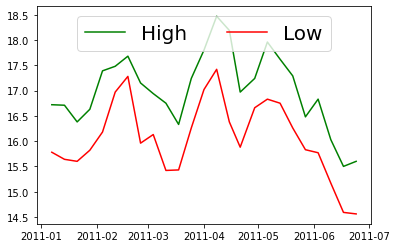

In [25]:
plt.plot(data["date"], data["high"], label="High", c="green")
plt.plot(data["date"], data["low"], label="Low", c="red")
plt.legend(loc="upper center", ncol=2, fontsize=20)
plt.show()

In [ ]:
plt.legend?

Referencia para la localización de la leyenda

| Location String | Location Code | 
|-----------------|---------------| 
| ‘best’          | 0             | 
| ‘upper right’   | 1             | 
| ‘upper left’    | 2             | 
| ‘lower left’    | 3             | 
| ‘lower right’   | 4             | 
| ‘right’         | 5             | 
| ‘center left’   | 6             | 
| ‘center right’  | 7             | 
| ‘lower center’  | 8             | 
| ‘upper center’  | 9             | 
| ‘center’        | 10            | 


## Anotaciones

Para incluir anotaciones se utiliza `plt.annotate`. Las anotaciones están basadas en flechas o relaciones de una coordenada con un texto. Como ejemplo indicaremos el minimo de los valores "low" y el maximo de los valores "max" con anotaciones.

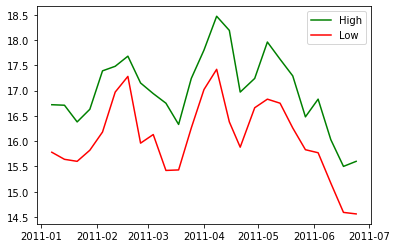

In [27]:
plt.plot(data["date"], data["high"], label="High", c="green")
plt.plot(data["date"], data["low"], label="Low", c="red")
plt.legend(loc="best")
plt.show()

In [28]:
high_max = data["high"].max()
high_max_date = data.loc[data["high"].idxmax(), "date"]
print(high_max, high_max_date)

18.47 2011-04-08 00:00:00


In [29]:
low_min = data["low"].min()
low_min_date = data.loc[data["low"].idxmin(), "date"]
print(low_min, low_min_date)

14.56 2011-06-24 00:00:00


In [30]:
from matplotlib import dates as mdates

In [31]:
print(high_max_date, mdates.date2num(high_max_date))

2011-04-08 00:00:00 15072.0


In [32]:
str(high_max)

'18.47'

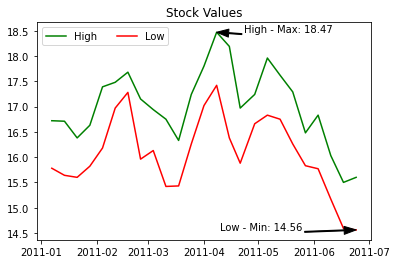

In [33]:
plt.plot(data["date"], data["high"], label="High", c="green")
plt.plot(data["date"], data["low"], label="Low", c="red")

plt.title("Stock Values")

plt.legend(loc="upper left", ncol=2)

plt.annotate("High - Max: " + str(high_max),
            xy=(high_max_date, high_max),
            xytext=(mdates.date2num(high_max_date) + 15, high_max),
            arrowprops={"facecolor":"black", "width": 1, "headwidth":8})

plt.annotate("Low - Min: " + str(low_min),
            xy=(low_min_date, low_min),
            xytext=(mdates.date2num(low_min_date) - 75, low_min),
            arrowprops={"facecolor":"black", "width": 1, "headwidth":8})

plt.show()

In [34]:
def mi_plot():
    
    plt.plot(data["date"], data["high"], label="High", c="green")
    plt.plot(data["date"], data["low"], label="Low", c="red")

    plt.title("Stock Values")

    plt.legend(loc="upper left", ncol=2)

    plt.annotate("High - Max: " + str(high_max),
                xy=(high_max_date, high_max),
                xytext=(mdates.date2num(high_max_date) + 15, high_max),
                arrowprops={"facecolor":"black", "width": 1, "headwidth":8})

    plt.annotate("Low - Min: " + str(low_min),
                xy=(low_min_date, low_min),
                xytext=(mdates.date2num(low_min_date) - 75, low_min),
                arrowprops={"facecolor":"black", "width": 1, "headwidth":8})

    plt.show()

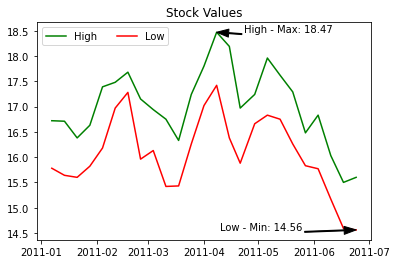

In [35]:
mi_plot()

In [36]:
low_min_date

Timestamp('2011-06-24 00:00:00')

In [37]:
mdates.date2num(low_min_date)

15149.0

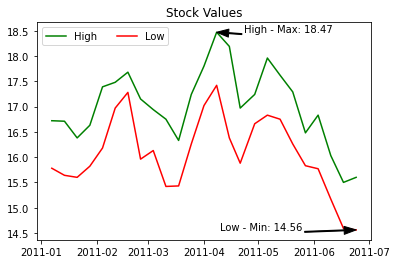

In [40]:
mi_plot()

## Styles

Pyplot acepta diferentes configuraciones de estilo.

In [41]:
from matplotlib import style

In [42]:
style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

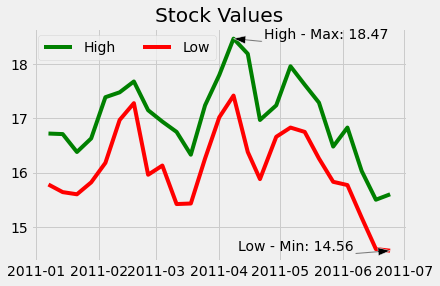

In [43]:
style.use("fivethirtyeight")
mi_plot()

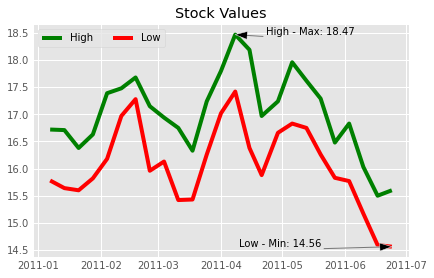

In [44]:
style.use("ggplot")
mi_plot()

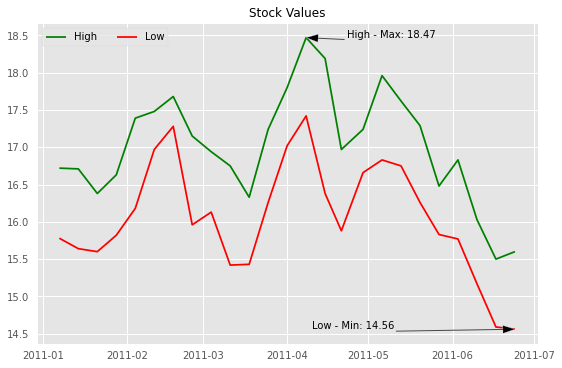

In [45]:
style.use("seaborn-notebook")
mi_plot()

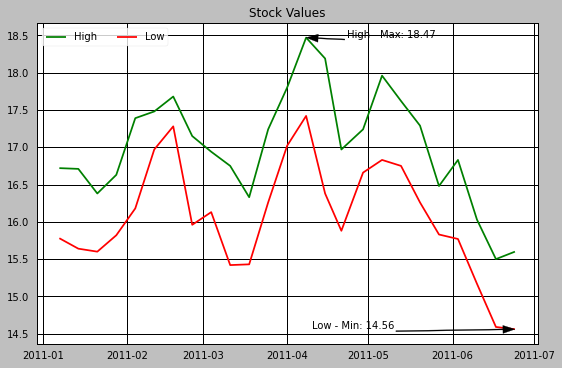

In [46]:
style.use("grayscale")
mi_plot()

## Referencias
Leyendas:
- https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html

Anotaciones:
- https://matplotlib.org/users/annotations.html

Styles:
- https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html